# Recurrent Neural Network (RNN) in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from tensorflow import keras
import tensorflow_datasets as tfds
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('GPU', tf.test.gpu_device_name(), 'configured')

GPU /device:GPU:0 configured


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from math import pi

# Generate points on a 2D line
n_points = 1000
noise_factor = 0
x = np.linspace(0, 10, n_points)
y = 3 * x + 2
# y = np.sin(x) 

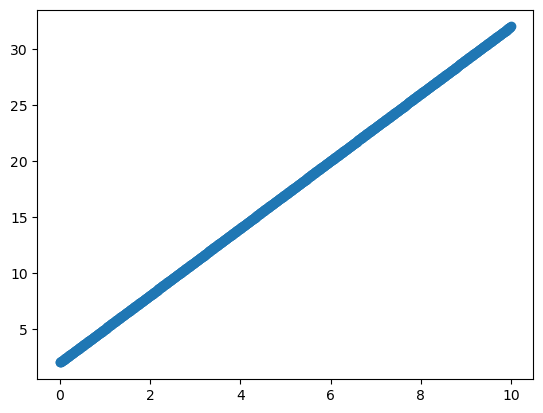

In [61]:
plt.scatter(x, y)

In [62]:
data = np.c_[x,y]
cut_point = n_points//2
train = data[:cut_point]
test = data[cut_point:]

In [63]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 10
n_features = 2
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)
generator_test = TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [6]:
generator[0]

(array([[[0.        , 2.        ],
         [0.1010101 , 2.3030303 ],
         [0.2020202 , 2.60606061],
         [0.3030303 , 2.90909091],
         [0.4040404 , 3.21212121],
         [0.50505051, 3.51515152],
         [0.60606061, 3.81818182],
         [0.70707071, 4.12121212],
         [0.80808081, 4.42424242],
         [0.90909091, 4.72727273]]]),
 array([[1.01010101, 5.03030303]]))

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, SimpleRNN

model = Sequential([
    LSTM(units=32, input_shape=(n_input, 2)),
#     SimpleRNN(units=32, return_sequences=True),
#     SimpleRNN(units=32, return_sequences=False),
#     Dense(units=100, activation="relu"),
#     Dense(units=100, activation="relu"),
    Dense(units=2, activation=None)
])
model.compile(loss='mse', optimizer='adam')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 32)            4480      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 100)               3300      
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 16,302
Trainable params: 16,302
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(generator,epochs=30, verbose=True, validation_data=generator_test)

Epoch 1/30
490/490 [==============================] - 3s 4ms/step - loss: 10.2900 - val_loss: 87.9282
Epoch 2/30
490/490 [==============================] - 2s 4ms/step - loss: 0.4442 - val_loss: 63.8716
Epoch 3/30
490/490 [==============================] - 2s 4ms/step - loss: 0.0872 - val_loss: 54.7126
Epoch 4/30
490/490 [==============================] - 2s 4ms/step - loss: 0.0306 - val_loss: 50.2657
Epoch 5/30
490/490 [==============================] - 2s 5ms/step - loss: 0.0132 - val_loss: 47.7208
Epoch 6/30
490/490 [==============================] - 2s 5ms/step - loss: 0.0054 - val_loss: 46.0388
Epoch 7/30
490/490 [==============================] - 2s 5ms/step - loss: 0.0142 - val_loss: 45.2286
Epoch 8/30
490/490 [==============================] - 2s 5ms/step - loss: 0.0141 - val_loss: 44.1575
Epoch 9/30
490/490 [==============================] - 2s 5ms/step - loss: 0.0021 - val_loss: 43.3387
Epoch 10/30
490/490 [==============================] - 2s 5ms/step - loss: 0.0043 - val_lo

In [72]:
test_predictions = []

first_eval_batch = train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
print(current_batch)
current_pred = model.predict(current_batch, verbose=False)
print(current_pred)

current_batch = np.append(current_batch[:,1:,:],[[current_pred[0]]],axis=1)
print(current_batch)

current_pred = model.predict(current_batch, verbose=False)
print(current_pred)

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch, verbose=False)
#     print(current_pred)
#     break

    # append the prediction into the array
    test_predictions.append(current_pred) 

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred[0]]],axis=1)

[[[ 4.9049049  16.71471471]
  [ 4.91491491 16.74474474]
  [ 4.92492492 16.77477477]
  [ 4.93493493 16.8048048 ]
  [ 4.94494494 16.83483483]
  [ 4.95495495 16.86486486]
  [ 4.96496496 16.89489489]
  [ 4.97497497 16.92492492]
  [ 4.98498498 16.95495495]
  [ 4.99499499 16.98498498]]]
[[ 4.9853396 16.955761 ]]
[[[ 4.91491491 16.74474474]
  [ 4.92492492 16.77477477]
  [ 4.93493493 16.8048048 ]
  [ 4.94494494 16.83483483]
  [ 4.95495495 16.86486486]
  [ 4.96496496 16.89489489]
  [ 4.97497497 16.92492492]
  [ 4.98498498 16.95495495]
  [ 4.99499499 16.98498498]
  [ 4.98533964 16.95576096]]]
[[ 4.9857383 16.960867 ]]


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f3c5805e4c0>
Traceback (most recent call last):
  File "/home/milton/miniconda3/envs/python_lectures/lib/python3.8/weakref.py", line 345, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 

KeyboardInterrupt



In [40]:
test_predictions

[array([[ 4.9041166, 16.702917 ]], dtype=float32),
 array([[ 4.9103823, 16.723064 ]], dtype=float32),
 array([[ 4.9143047, 16.735731 ]], dtype=float32),
 array([[ 4.916827, 16.743906]], dtype=float32),
 array([[ 4.9184637, 16.749214 ]], dtype=float32),
 array([[ 4.9195023, 16.752586 ]], dtype=float32),
 array([[ 4.9201164, 16.754576 ]], dtype=float32),
 array([[ 4.920418, 16.755543]], dtype=float32),
 array([[ 4.920498, 16.755795]], dtype=float32),
 array([[ 4.920494, 16.755789]], dtype=float32),
 array([[ 4.920555, 16.755987]], dtype=float32),
 array([[ 4.9205923, 16.756107 ]], dtype=float32),
 array([[ 4.920615, 16.756182]], dtype=float32),
 array([[ 4.9206295, 16.756227 ]], dtype=float32),
 array([[ 4.920637, 16.756254]], dtype=float32),
 array([[ 4.920642, 16.75627 ]], dtype=float32),
 array([[ 4.920644, 16.756275]], dtype=float32),
 array([[ 4.9206448, 16.756279 ]], dtype=float32),
 array([[ 4.9206457, 16.75628  ]], dtype=float32),
 array([[ 4.9206457, 16.75628  ]], dtype=float32)

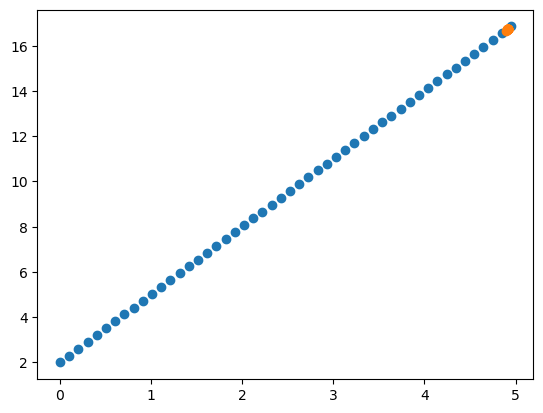

In [38]:
plt.scatter(train[:,0], train[:,1])
pred = np.vstack(test_predictions)
plt.scatter(pred[:,0], pred[:,1])

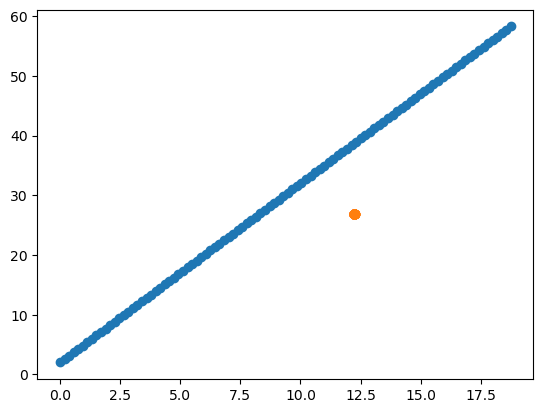

In [93]:
def train_and_plot_lstm(x, y, cutpoint, n_input, neuron_count=(32, 32), epochs=20, verbose=True):
    data = np.c_[x,y]
    cut_point = n_points//2
    train = data[:cut_point]
    test = data[cut_point:]

    n_features = 2
    generator = TimeseriesGenerator(train, train, length=n_input, batch_size=1)

    model = Sequential([
        LSTM(units=neuron_count[0], input_shape=(n_input, 2), return_sequences=True),
        LSTM(units=neuron_count[1], return_sequences=False),
        Dense(units=2, activation=None)
    ])

    model.compile(loss='mse', optimizer='adam')
    model.fit(generator,epochs=epochs, verbose=verbose)

    test_predictions = []

    first_eval_batch = train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(test)):

        # get the prediction value for the first batch
        current_pred = model.predict(current_batch, verbose=False)[0]

        # append the prediction into the array
        test_predictions.append(current_pred) 

        # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

    plt.scatter(train[:,0], train[:,1])
    pred = np.vstack(test_predictions)
    plt.scatter(pred[:,0], pred[:,1])
    
n_points = 200
noise_factor = 0
x = np.linspace(0, 12*pi, n_points)
y = 3 * x + 2

train_and_plot_lstm(x, y, 100, 10, epochs=10, verbose=False)

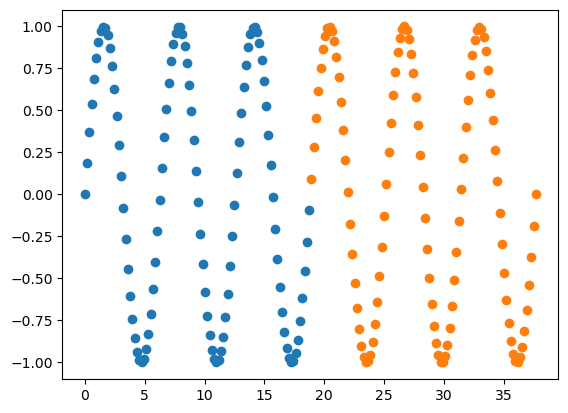

In [70]:
n_points = 200
noise_factor = 0
x = np.linspace(0, 12*pi, n_points)
y = np.sin(x) 

train_and_plot_lstm(x, y, 100, 10, epochs=20, verbose=False)

Lets use fewer points in the window

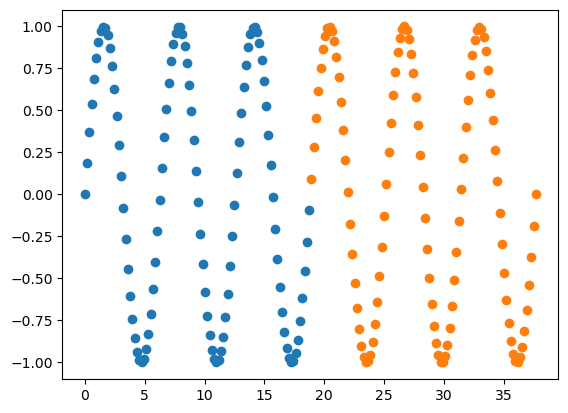

In [81]:
n_points = 200
noise_factor = 0
x = np.linspace(0, 12*pi, n_points)
y = np.sin(x) 

train_and_plot_lstm(x, y, 100, 3, epochs=20, verbose=False)

Now, lets add some noise

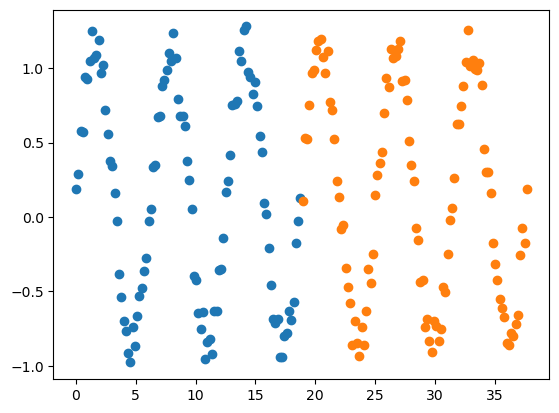

In [71]:
n_points = 200
noise_factor = 0
x = np.linspace(0, 12*pi, n_points)
y = np.sin(x) + np.random.rand(n_points) * 0.3

train_and_plot_lstm(x, y, 100, 10, epochs=20, verbose=False)

Can I take fewer points if there is noise?

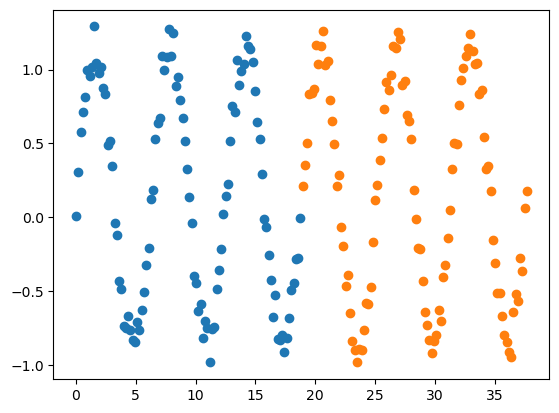

In [82]:
n_points = 200
noise_factor = 0
x = np.linspace(0, 12*pi, n_points)
y = np.sin(x) + np.random.rand(n_points) * 0.3

train_and_plot_lstm(x, y, 100, 3, epochs=20, verbose=False)